<a href="https://colab.research.google.com/github/mohani98/ML_project/blob/main/Individual_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name : Netflix Movies and TV Shows Clustering**
# Project Type unsupervised ML
# Batch : Cohort Seoul

# **Problem Statement**

 The problem statement revolves around improving the Netflix experience for users by understanding their preferences and viewing habits. By analyzing data on what users watch and how they interact with the platform, the goal is to enhance Netflix's recommendation algorithms. This can lead to better personalized recommendations, ultimately increasing user satisfaction and engagement with the platform.

# Project summary

**With more than 83 million subscribers and presence in more than 190 countries, Netflix is the most popular Internet television network in the world. Its users watch more than 125 million hours of TV and movie content daily, including original series, documentaries, and feature films. On almost any screen that is linked to the Internet, members can watch as much as they want, whenever and wherever. Without interruptions or obligations, members can play, pause, and resume watching at any time.**

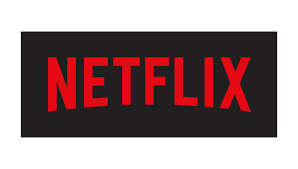

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

#  **Business Objective** : Netflix's business objectives for clustering movies and TV shows are closely aligned with enhancing the user experience, optimizing content selection and promotion, and ultimately retaining subscribers in a competitive streaming landscape. Clustering serves as a powerful tool in achieving these objectives and maintaining Netflix's position as a leader in the streaming industry than other to make more profit .

## <b>Task
 <br>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

<font size="+2" color='#a30762'><b><i><u>Steps</u>
* <font size="+2" color='#053c96'> <b>Importing Libraries
* <font size="+2" color='#053c96'> <b>Import Data
* <font size="+2" color='#053c96'> <b>Data Summary
* <font size="+2" color='#053c96'> <b>Data Visualization
* <font size="+2" color='#053c96'> <b>Data Cleaning ( EDA )
* <font size="+2" color='#053c96'> <b>Feature Selection
* <font size="+2" color='#053c96'> <b> Model Selection
* <font size="+2" color='#053c96'><b> Hyperparameter Tuning
* <font size="+2" color='#053c96'><b>Conclusion


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

##  <font size="+2" color='#947318'> <b>1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


##  <font size="+2" color='#947318'> <b>2. Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')


##  <font size="+2" color='#947318'> <b>3. Basic Data Exploration

### 3.1 df.head()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### 3.2 df.shape

In [ ]:
df.shape

(7787, 12)

### 3.3 df.info()

In [ ]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.9 MB


### 3.4 df.columns

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 3.5 Defining *DataInfoAll*

In [ ]:
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*125)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    return summary

In [ ]:
DataInfoAll(df)

Dataset Shape: (7787, 12)
-----------------------------------------------------------------------------------------------------------------------------


,Name,dtypes,Missing,Uniques,First Value,Second Value
0,show_id,object,0,7787,s1,s2
1,type,object,0,2,TV Show,Movie
2,title,object,0,7787,3%,7:19
3,director,object,2389,4049,NaN,Jorge Michel Grau
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
5,country,object,507,681,Brazil,Mexico
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016"
7,release_year,int64,0,73,2020,2016
8,rating,object,7,14,TV-MA,TV-MA
9,duration,object,0,216,4 Seasons,93 min


### 3.6  Checking duplicate values

In [ ]:
df_duplicate = df[df.duplicated()]
print("Let's print all the duplicated rows as a dataframe")
df_duplicate

Let's print all the duplicated rows as a dataframe


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* No duplicate values present in this dataset.

##  <font size="+2" color='#154085'> <b>4. Data Cleaning & Data Visualization

### 4.1 Checking NaN values

In [ ]:
NaN_Checker = pd.DataFrame({"No Of Total Values": df.shape[0] , "No of NaN values": df.isnull().sum(),
                    "%age of NaN values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
NaN_Checker.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


* **director** *column has highest NaN values 30.7% data is missing*
* **cast** *column has 9% NaN values*
* **country , date_added , rating** this columns also containing missing values


* Ploting the null values present in the dataset


In [ ]:
plot_nan = df.isna()
plot_nan.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

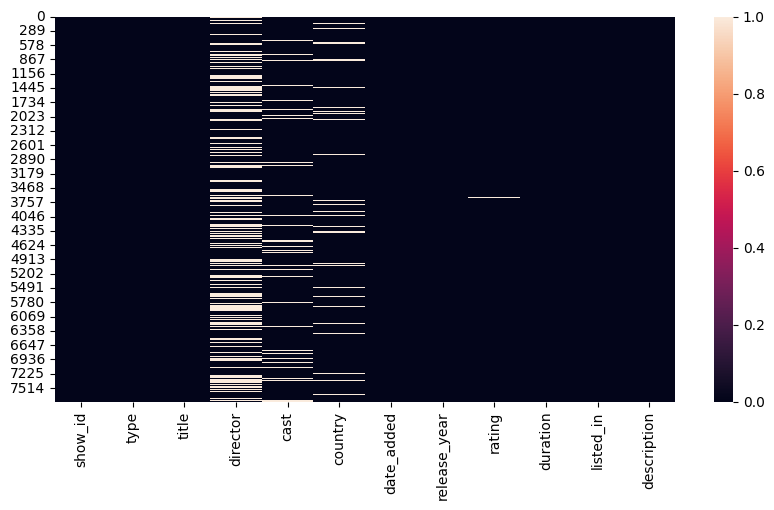

In [ ]:
plt.figure( figsize = (10 , 5))
sns.heatmap(plot_nan)

* Using barplot to check the no of NaN values present in this dataset

<BarContainer object of 12 artists>

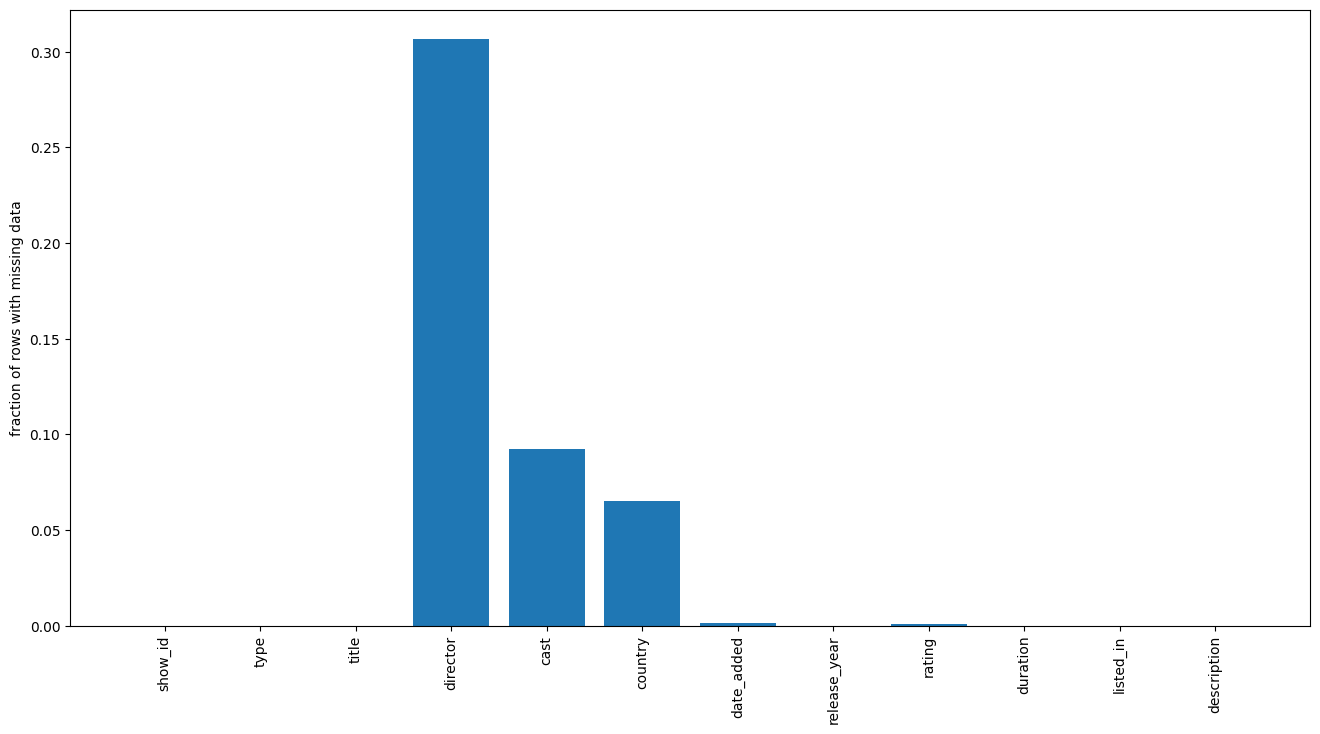

In [ ]:
# null value distribution
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

director and cast contains large number of null values so we will drop it


### 4.2 Dropping irrelevent features

In [ ]:
df.drop(['director','cast'],axis=1, inplace=True)

### 4.3 Looking NaN values on data_added

In [ ]:
data_added_NaN = df[df['date_added'].isna()]
data_added_NaN.head(2)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


In [ ]:
data_added_NaN.shape

(10, 10)

* There are only 10 observations which are containing NaN values in *data_added* column

In [ ]:
print(f"Before dropping the NaN values from date_added the shape was {df.shape}")
df.dropna(subset = [ 'date_added' ], inplace = True)
print(f"After dropping the NaN values from date_added now the shape is {df.shape}")

Before dropping the NaN values from date_added the shape was (7787, 10)
After dropping the NaN values from date_added now the shape is (7777, 10)


### 4.4 Looking for unique values

In [ ]:
df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

* Unique values of *type* column

In [ ]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

* ### <b><i>4.5 Production Growth </b> based on type of the content & release_year  

In [ ]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [ ]:
yearly_movies.head()

release_year
2021     19
2020    457
2019    414
2018    386
2017    268
Name: count, dtype: int64

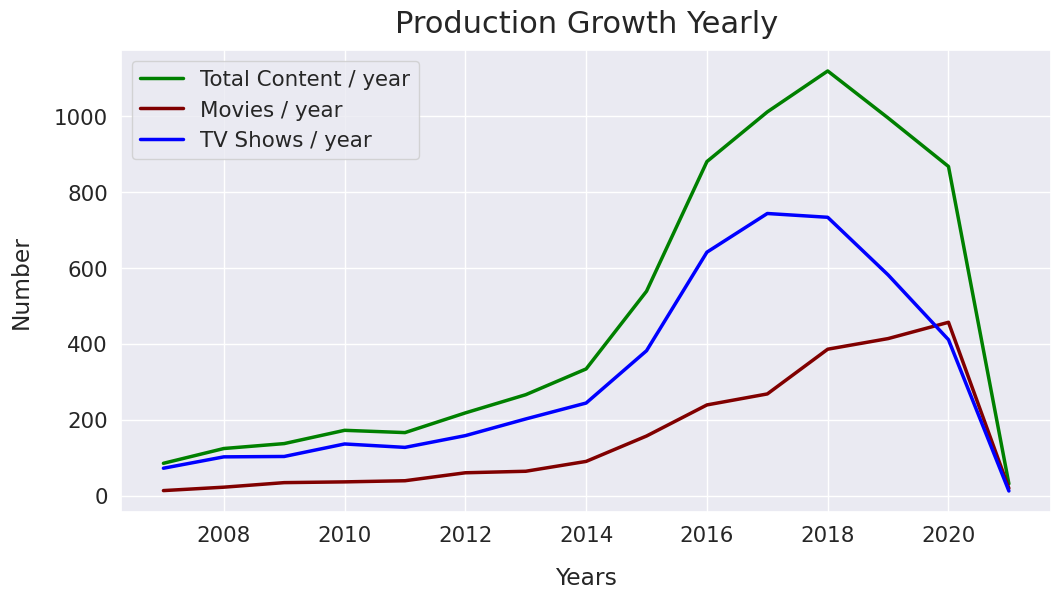

In [ ]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

1. Why did you pick the specific chart?

Line charts are simple and intuitive, making them accessible to a wide audience. They convey information clearly without overwhelming the viewer with unnecessary details. Line charts allow for easy comparison between different trends or data series. By plotting multiple lines.

2. What is/are the insight(s) found from the chart?

The total content rises 1000+ in the year 2018.The count of the movies content rises in the year 2020 and further TV shows content it was at the peak in 2017.

3. Will the gained insights help creating a positive business impact?

Yes it helps in creating a positive business impact.A particular production company can get insights from the graph in the content aspect and viewers likings.

* ### 4.6 **release_year**

* #### 4.6.1 Let's see all unique values present in *release_year*

In [ ]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

* #### 4.6.2 Checking the Datatype of *release_year* column

In [ ]:
type(df['release_year'][0])

numpy.int64

* #### 4.6.3 value_count is on release_year

In [ ]:
df['release_year'].value_counts().to_frame().T

release_year,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
count,1120,1012,996,881,868,539,334,266,218,172,...,2,2,2,2,2,1,1,1,1,1


* #### 4.6.4 Checking **outliers** on *release_year* column

<Axes: ylabel='release_year'>

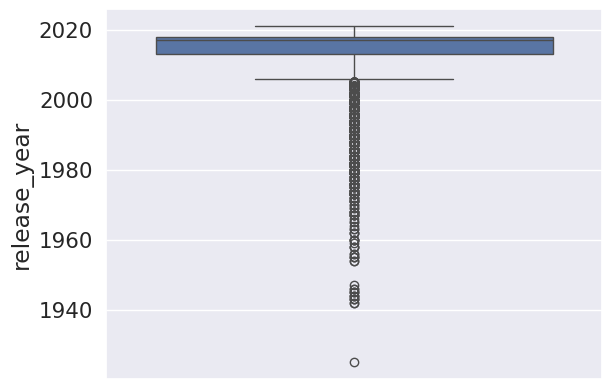

In [ ]:
sns.boxplot(df.release_year)

* As we have seen earlier **before 2014 the production growth for Movies & Tv Shows were very less** ,that's why it's showing those values*(release_year less than 2009)* as outliers

In [ ]:
type(df.release_year[0])

numpy.int64

# Handling outlier

* #### 4.6.5 Replacing outliers with mean value

In [ ]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


* we don't have have any release_year which is greater than 2018

In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [ ]:
release_year_outliers

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Æon Flux,United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,"Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


In [ ]:
# 15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

* #### 4.6.6 Boxplot for release_year

In [ ]:
df.release_year.describe()

count    7777.000000
mean     2016.260846
std         2.726841
min      2009.000000
25%      2013.935965
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

<Axes: ylabel='release_year'>

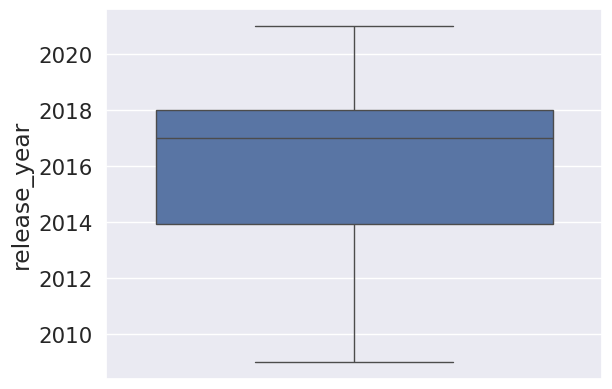

In [ ]:
sns.boxplot(df.release_year)

In [ ]:
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))
df.release_year = df.release_year.astype("int64")
print(f"Datatype of release_year = ",type(df.release_year.iloc[0]))

Datatype of release_year =  <class 'numpy.float64'>
Datatype of release_year =  <class 'numpy.int64'>


1. Why did you pick the specific chart?

A box plot provides a concise summary of the distribution of the data, including the median, quartiles, and potential outliers. This makes it easy to understand the central tendency and spread of the dataset at a glance.Box plot provide a clear visual representation of the distribution even when the data is not normally distributed.

2. What is/are the insight(s) found from the chart?

The most content is released between year 2014 and 2018.


##Exploratory Data Analysis Conclusions
---
---
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**
---
> * **There are almost twice as many movies as TV shows on Netflix.**
---
> * **Most content on Netflix is rated for Mature Audiences and over 14 years old**
---
> **Top Countries in Netflix are:**
1. **United States**
2. **India**
3. **United Kingdom**
4. **Canada**
5. **France**

---
> **Top Genres in Netflix are:**
1. **Drama**
2.**Comedy**
3.**Documentary**
4.**Action and Adventure**
5.**Romance**

---
> **Top Directors on Netflix are:**
1. **Jan Suter**
2.**Raul Campos**
3.**Marcus Raboy**
4.**Jay Karas**
5.**Cathy Garcia-Molina**

---
> **Top Actors on Netflix are:**
1. **Anupam Kher**
2.**Shah Rukh Khan**
3.**Naseeruddin Shah**
4.**Om Puri**
5.**Akshay Kumar**

---
> * **Most movies on Netflix have a duration range from 90 to 110 minutes**
---
> * **Most TV shows on Netflix have a span of only one season**.
---

## <font size='+2' color = '#154085'> <B> End Conclusion.</b>

1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.
3. We have reached a conclusion from our analysis from the content added over years that
Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is
increased by 80% and TV shows is increased by 73% compare)
4. From the dataset insights we can conclude that the most number of TV Shows released in
2017 and for Movies it is 2020
5. On Netflix USA has the largest number of contents. And most of the countries preferred to
produce movies more than TV shows.
6. Most of the movies are belonging to 3 categories
7. TOP 3 content categories are International movies , dramas , comedies.
8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF
vectorizer and other functions of NLP.
9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,
DBSCAN on data we got the best cluster arrangements.
10.By applying different clustering algorithms to our dataset .we get the optimal number of
cluster is equal to 3
